# Descision Tree Classification 

In [1]:
# decision tree mei hum categorical variables ko numerical ya labeeel meu kuen krty hai convert? 
# easy hota hai computers ko understand ky liye is liye hm 0 aur 1 mei kr dety hai 
# kbhi kbhi names bhi bry hoty hai to hm isko numbers dy dety hai is sy computer ki speed bhi ziada ho jati hai 


In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn import tree 




In [5]:
df = sns.load_dataset('titanic')

In [6]:
X = df[['pclass','sex','age','sibsp','parch','fare']]
y = df['survived']

In [7]:
X =  pd.get_dummies(X, columns=['sex'])

In [8]:
X.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [9]:
X.age.fillna(value=X['age'].mean(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2016\1520641283.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.age.fillna(value=X['age'].mean(),inplace=True)


In [10]:
X.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_female    0
sex_male      0
dtype: int64

In [11]:
X

,pclass,age,sibsp,parch,fare,sex_female,sex_male
0,3,22.000000,1,0,7.2500,False,True
1,1,38.000000,1,0,71.2833,True,False
2,3,26.000000,0,0,7.9250,True,False
3,1,35.000000,1,0,53.1000,True,False
4,3,35.000000,0,0,8.0500,False,True
...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,False,True
887,1,19.000000,0,0,30.0000,True,False
888,3,29.699118,1,2,23.4500,True,False
889,1,26.000000,0,0,30.0000,False,True


In [12]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [13]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2) 

In [14]:
model = DecisionTreeClassifier()

model.fit(X_train,y_train) 

DecisionTreeClassifier()

In [15]:
y_pred = model.predict(X_test)

In [16]:
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 0.7374301675977654


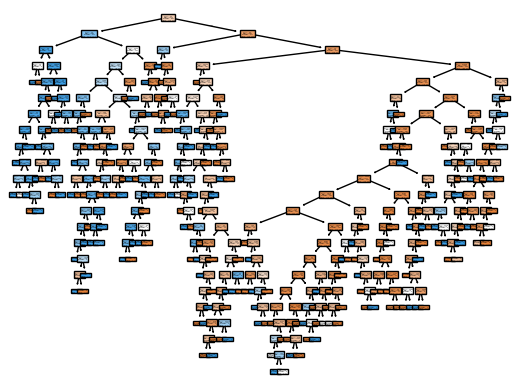

<Figure size 640x480 with 0 Axes>

In [17]:
tree.plot_tree(model.fit(X,y),filled=True)

plt.show()
plt.savefig("tree.png")


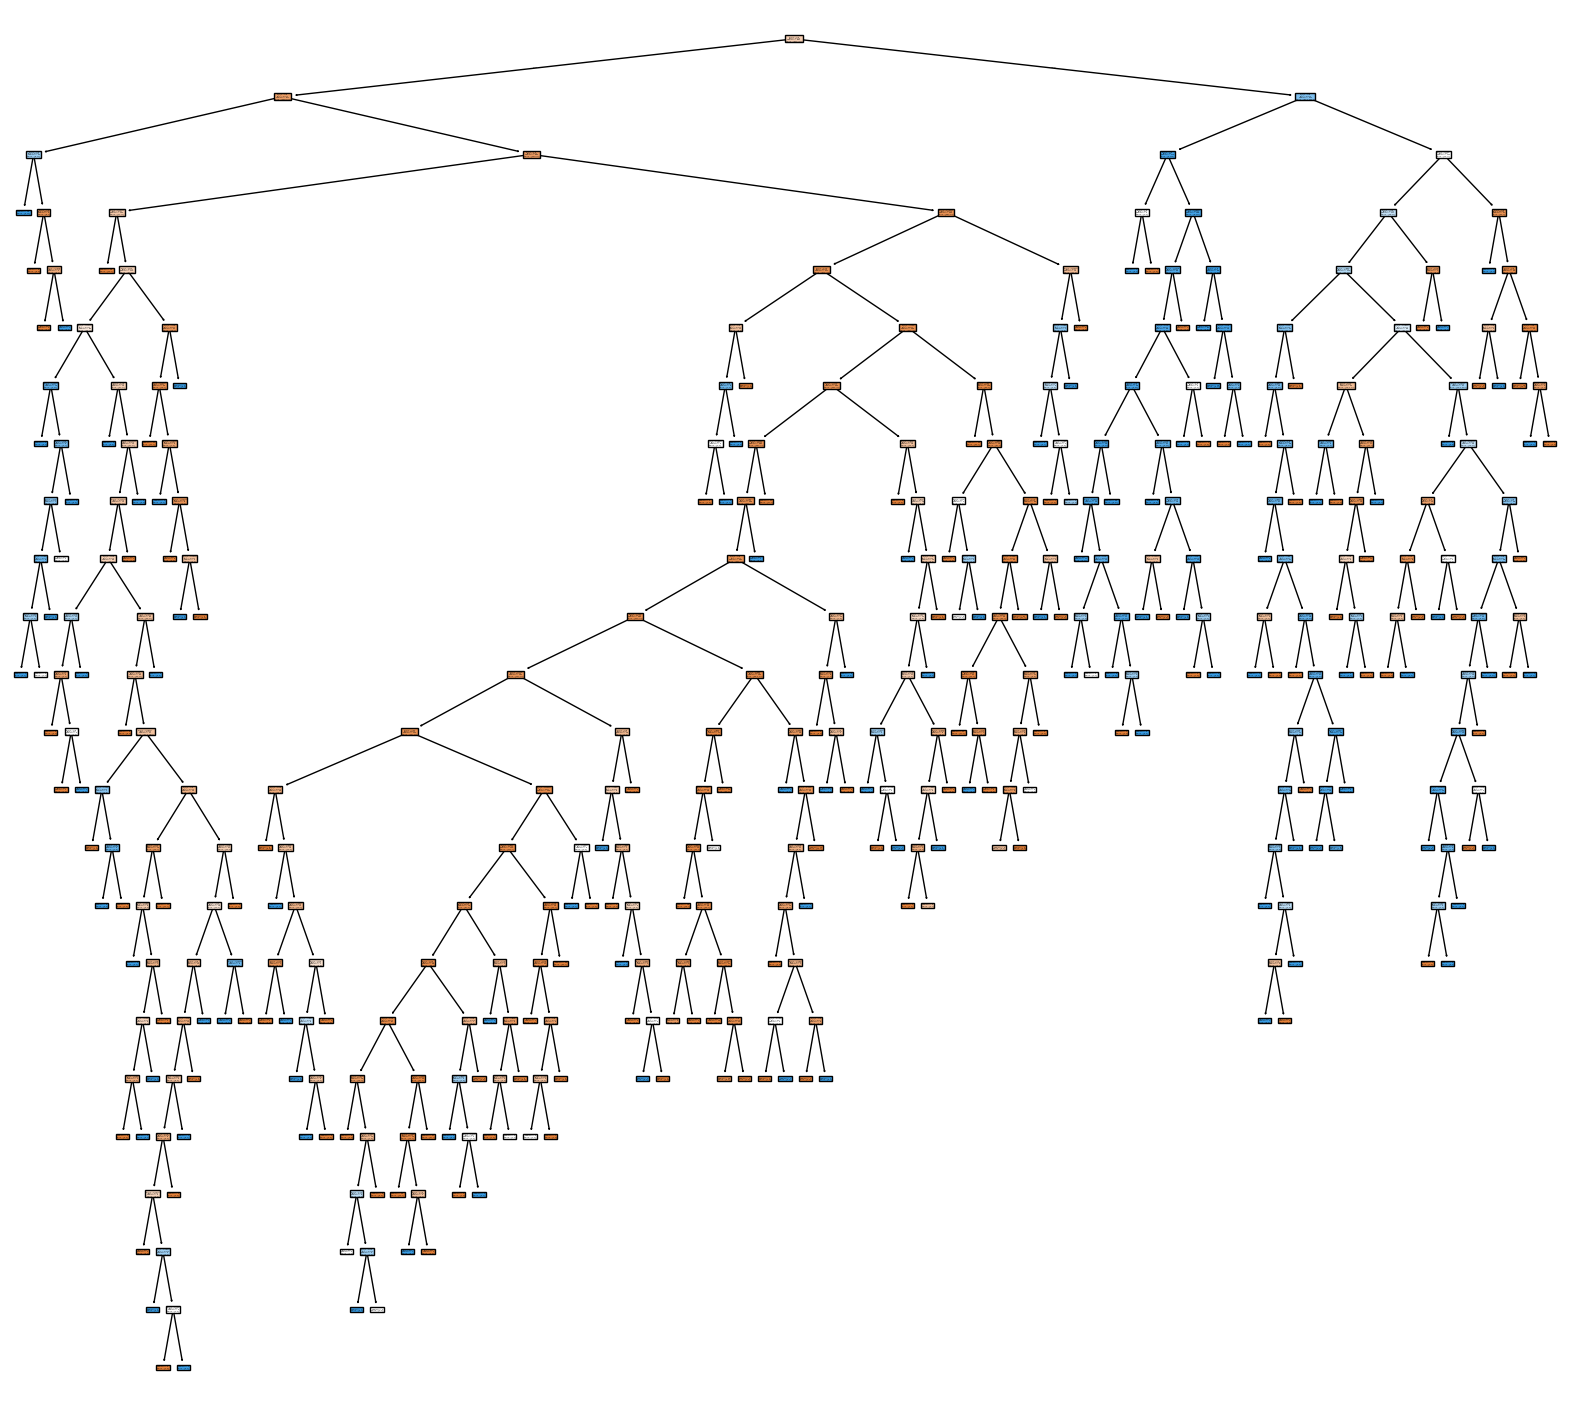

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,18))

tree.plot_tree(model.fit(X,y),filled=True)

plt.show()

plt.savefig("descision_tree.pdf", format="pdf",dpi=300)

In [19]:
# precision 

from sklearn.metrics import precision_score
precision_score(y_test, y_pred)
# precision score is base pr hota hai kah kitna percent hmny sach btaya hai kah itna log survived kia ahi 
# kiitny % log survived kiye hai us mei sy jo hmny btay hai 
# jo hmny btaya hai kah wo kitna positive hai ya nahi 
 

0.6567164179104478

## Precision: precision measure the propotion of true positive predictions among all positive predictions.

## Recall: recall measures the propotion of true positive predictions among all actual positive instances

In [20]:
# recall score

from sklearn.metrics import recall_score
recall_score(y_test, y_pred)
# actual jo ka huwa hai wo btata hai 
# mtlb agr 140 bndy doby hai to hmny baty  100 duby hai  
# hmny ye andaza lgana hai kah sach mei bachy hai ya nahi 

0.6470588235294118

In [21]:
# f1 score

from sklearn.metrics import f1_score
f1_score(y_test, y_pred) 
# f1 score precision aur recall ka harmonic  mean hai 
# mtlb average of these two  


0.6518518518518519

In [38]:
# ab hm confusion matrics nikalty hai  
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[96, 15],
       [19, 49]])

Text(50.722222222222214, 0.5, 'True label')

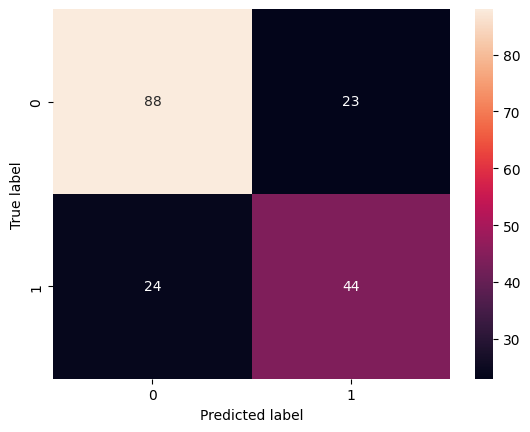

In [23]:
# isko hm ab sns ki library use kr kah plot krty hai 
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [24]:
# ab hum agy move krty hai 
# hyper para meter tunning 
# grid search cross validation 
# is mei hm 3 4 neighbours ki value ai sath dy dety hai aur wo hmne bta deta hai kah best konsa hai 



# K Nearest Neighbour (KNN)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred= model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[93, 18],
       [27, 41]])

Text(50.722222222222214, 0.5, 'True label')

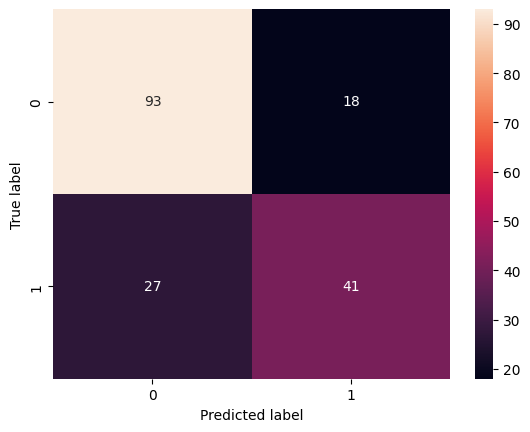

In [26]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [27]:
# phir hm iska precision aur accuracy score bhi isi trha check kr skty hai 


# Random Forest model 

In [28]:
# random forest aik model hai jis mei bohat sary tree milkrwork krty hai aur descicion jo large tree ho ga unki base pr ho ga 
# we've multiple  trees 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train) # train the model
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[96, 15],
       [22, 46]])

In [29]:
# phir hm isi mei isi trha f1 score aur sb  kuch find out krlein gy 
print("f1 score:", f1_score(y_test, y_pred))
print("recall score:", recall_score(y_test, y_pred))
print("precision score:", precision_score(y_test, y_pred))

f1 score: 0.7131782945736435
recall score: 0.6764705882352942
precision score: 0.7540983606557377


# Logisic regression is a model of classifcation 

In [30]:
# is mei iak function use hota hai jis ko sigmoid function kaht hai 
# ye pury dataset ko binary classifcation mei covert kr deta hai 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train) # train the model
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm


array([[97, 14],
       [19, 49]])

In [31]:
# phir hm isi mei isi trha f1 score aur sb  kuch find out krlein gy 
print("f1 score:", f1_score(y_test, y_pred))
print("recall score:", recall_score(y_test, y_pred))
print("precision score:", precision_score(y_test, y_pred))
# in three matrics ki base pr hm decide krty hai kah hm konsa model use kren gy 

f1 score: 0.7480916030534351
recall score: 0.7205882352941176
precision score: 0.7777777777777778


# SVM support vector machine 

In [32]:
# ye aik hyper plane bna deta hai jis ki base pr svm khud hi decide krta hai kah line kahan lgy gi 
# aisy model tb kam krty haijb hm achy sy data ko refine kr sken 
# agr regression ho to svr use kren gy aur agr classifcation ho to svc use kren gy 

from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train) # train the model
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm) # print the confusion matrix

[[102   9]
 [ 42  26]]


In [33]:
# print metrics 

print("f1 score:", f1_score(y_test, y_pred))
print("recall score:", recall_score(y_test, y_pred))
print("precision score:", precision_score(y_test, y_pred))

f1 score: 0.5048543689320388
recall score: 0.38235294117647056
precision score: 0.7428571428571429


# Naive Bayes 

In [34]:
# import naive bayes 

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train) # train the model
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred) # confusion matrix 
cm 

array([[96, 15],
       [19, 49]])

In [35]:
# print metrics 

print("f1 score:", f1_score(y_test, y_pred))
print("recall score:", recall_score(y_test, y_pred))
print("precision score:", precision_score(y_test, y_pred))

f1 score: 0.7424242424242424
recall score: 0.7205882352941176
precision score: 0.765625


In [36]:
# which model is best from all of these six 
import numpy as np 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
# define models to be evaluted 
models = [LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),SVC()]
names = ["logistic regression","Random forest", "KNN", "SVM"]
# perform k-fold cross-validation on each model
k = 10
for name, model in zip(names,models):
    cv_scores = cross_val_score(model,X_train,y_train, cv=k)
    print(f"{name} CV accuracy:{np.mean(cv_scores):.3f} +/-{np.std(cv_scores):.3f}")
# for loop ko use kr rhy hai hm for validation ky liye 

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mod

logistic regression CV accuracy:0.788 +/-0.041
Random forest CV accuracy:0.810 +/-0.049
KNN CV accuracy:0.701 +/-0.043
SVM CV accuracy:0.666 +/-0.053
